# 分析DEMO① 『讃美歌21』のテキスト分析



+ データハンドリング
+ 単語の頻度の集計
+ TF-IDF
+ 共起関係


In [1]:
# ライブラリの読み込み
library('tidyverse')
library('RMeCab')


-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

√ ggplot2 3.3.2     √ purrr   0.3.4
√ tibble  3.0.1     √ dplyr   1.0.0
√ tidyr   1.1.0     √ stringr 1.4.0
√ readr   1.3.1     √ forcats 0.5.0

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



In [ ]:
# getwd()

In [2]:
df = read.delim('data/sanbika21.tsv', header=T, sep='\t', stringsAsFactors=F, fileEncoding='utf8')

+ id: 番号
+ title: タイトル
+ verse: 1番, 2番といった節番号
+ lyric: 歌詞。行ごとに全角コロン(：)で区切っている


In [3]:
df %>% head(1)

,id,title,verse,lyric
,<chr>,<chr>,<chr>,<chr>
1,001,主イェスよ、われらに,1,主イェスよ、われらに きよきみ顔向け、：聖霊をくだして 導きをたまえ。


In [4]:
# 各節の歌い出しをまとめてみる
df['first_line'] = df[, 'lyric'] %>% str_extract('^[^：]+')

In [5]:
df[c('id', 'title', 'verse', 'first_line')] %>% head()

,id,title,verse,first_line
,<chr>,<chr>,<chr>,<chr>
1,001,主イェスよ、われらに,1,主イェスよ、われらに きよきみ顔向け、
2,001,主イェスよ、われらに,2,礼拝につどえる み民をつよめて、
3,001,主イェスよ、われらに,3,われ、み顔をあおぎ、喜びに満ちて、
4,001,主イェスよ、われらに,4,父と子と聖霊 ひとりのみ神に、
5,002,聖なるみ神は,1,聖なるみ神は われらの集いに
6,002,聖なるみ神は,2,救いのみ神は 悔いたる心に


In [6]:
# 以下の讃美歌は分析から除外する

excluded = c('033', '038', '043-1', '043-2', '176', '177', 
             paste('039', 1:7, sep ='-'), paste('040', 1:8, sep ='-'))


In [7]:
excluded

[1] "033"   "038"   "043-1" "043-2" "176"   "177"   "039-1" "039-2" "039-3"
[10] "039-4" "039-5" "039-6" "039-7" "040-1" "040-2" "040-3" "040-4" "040-5"
[19] "040-6" "040-7" "040-8"

In [8]:
df %>% filter(id %in% excluded) %>% select(id, title, first_line)

id,title,first_line
<chr>,<chr>,<chr>
033,キリエ、キリエ,キリエ、キリエ、
038,グローリア、グローリア,グローリア、グローリア、インエクセールシスデオ。
039-1,ハレルヤ,ハレルヤ、
039-2,ハレルヤ,ハレルヤ、
039-3,ハレルヤ,ハレルヤ、
039-4,ハレルヤ,ハレルヤ、
039-5,ハレルヤ,ハレルヤ、
039-6,ハレルヤ,ハレルヤ、
039-7,ハレルヤ,ハレルヤ、


In [9]:
df = df %>% filter(!id %in% excluded)

In [10]:
# 曲ごとにデータをまとめる
# group_by(): データを集約する
# summarise(): データを特定の関数でまとめる
# n(): データの個数を集計
# paste(): 文字列を結合 collapseで結合する文字を指定

songs = df %>% group_by(id, title) %>% 
    summarise(verses= n(), body = paste0(lyric, collapse='\n')) %>% as.data.frame()

`summarise()` regrouping output by 'id' (override with `.groups` argument)



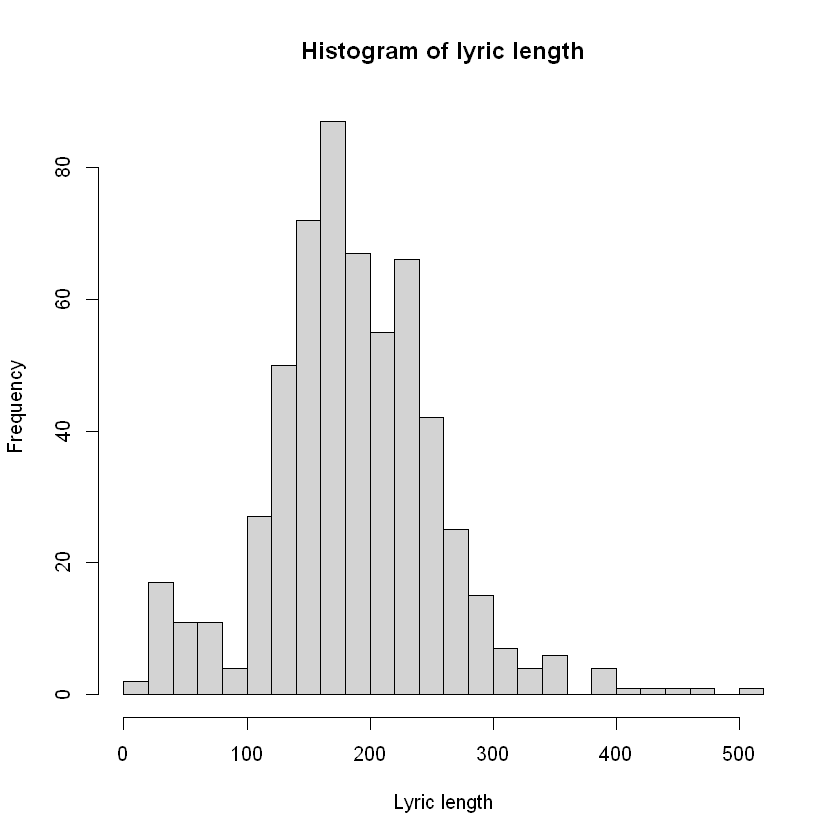

In [11]:
options(repr.plot.width=7, repr.plot.height=7)

# 曲の長さ(文字数)
# str_length(): 文字列の長さ
songs[, 'body'] %>% str_length() %>% hist(breaks=25, xlab='Lyric length', main='Histogram of lyric length')

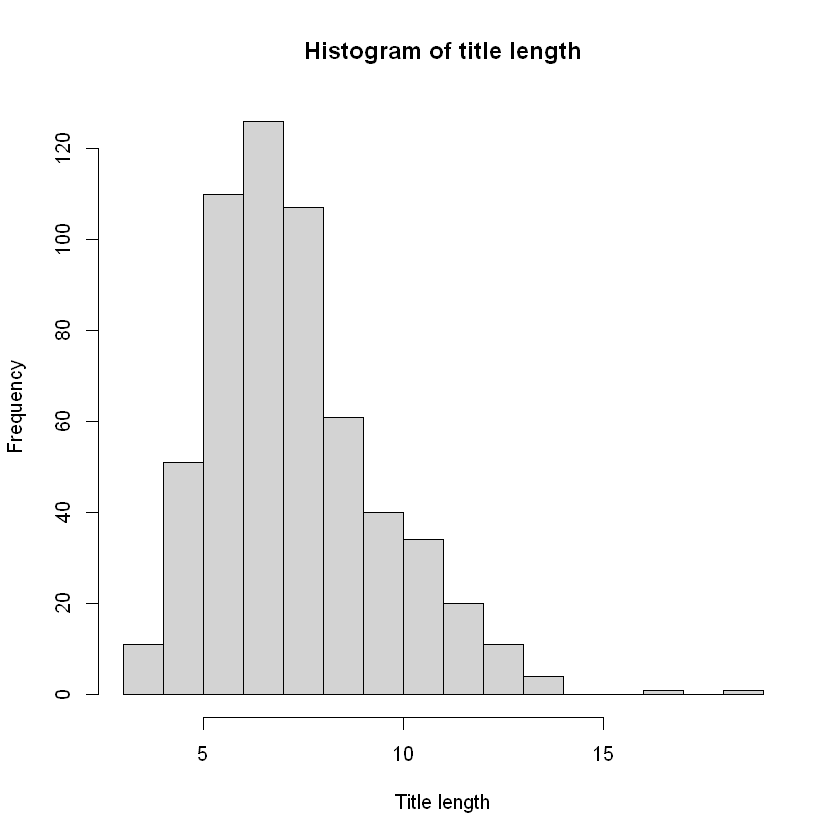

In [12]:
# タイトルの長さ(文字数)
songs[, 'title'] %>% str_length() %>% hist(breaks=20, xlab='Title length', main='Histogram of title length')

In [13]:
# 何番まであるか
# table(): 頻度を集計
songs[, 'verses'] %>% table()

.
  1   2   3   4   5   6   7   8   9  10 
 42  20 133 195 109  55  11   7   4   1 

In [14]:
# データの形状を確認する
dim(songs)

[1] 577   4

In [15]:
# docMatrixDF: dataframeから単語を抽出
# トークンを数える

count_noun = docMatrixDF(songs[,'body'], pos=c('名詞'))

to make data frame



In [17]:
count_noun 

,ROW.1,ROW.2,ROW.3,ROW.4,ROW.5,ROW.6,ROW.7,ROW.8,ROW.9,ROW.10,...,ROW.568,ROW.569,ROW.570,ROW.571,ROW.572,ROW.573,ROW.574,ROW.575,ROW.576,ROW.577
!,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
!：,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
",",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
",：",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
.,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
.：,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
:,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Alleluja,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Burning,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Cantabo,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
# 含まれている単語
count_noun %>% rownames()

[1] "!"                                  "!："                               
   [3] ","                                  ",："                               
   [5] "."                                  ".："                               
   [7] ":"                                  "Alleluja"                          
   [9] "Burning"                            "Cantabo"                           
  [11] "Cantate"                            "Christ"                            
  [13] "Confitemini"                        "Deo"                               
  [15] "Domini"                             "Domino"                            
  [17] "Dominum"                            "Jesus"                             
  [19] "Jubilate"                           "Laudate"                           
  [21] "Lord"                               "Micorazon"                         
  [23] "Misericordias"                      "O"                                 
  [25] "Santo"                              "Senor"                             
  [27] "Stay"                               "Then"                              
  [29] "adora"                              "aeternum"                          
  [31] "alleluja"                           "bo"                                
  [33] "darkness"                           "decir"                             
  [35] "eres"                               "fall"                              
  [37] "gentes"                             "heart"                             
  [39] "in"                                 "laudate"                           
  [41] "light"                              "night"                             
  [43] "nus"                                "omnes"                             
  [45] "omnis"                              "our"                               
  [47] "quoniam"                            "sabe"                              
  [49] "soon"                               "stay"                              
  [51] "te"                                 "terra"                             
  [53] "us"                                 "will"                              
  [55] "with"                               "・"                                
  [57] "あい"                               "あかし"                            
  [59] "あかつき"                           "あく"                              
  [61] "あくせく"                           "あくま"                            
  [63] "あけ"                               "あこがれ"                          
  [65] "あし"                               "あした"                            
  [67] "あたり"                             "あだな"                            
  [69] "あて"                               "あと"                              
  [71] "あなた"                             "あふれ"                            
  [73] "あま"                               "あめ"                              
  [75] "あゆ"                               "あら"                              
  [77] "あらし"                             "あらた"                            
  [79] "あるじ"                             "あれ"                              
  [81] "い"                                 "いいなずけ"                        
  [83] "いくさ"                             "いこい"                            
  [85] "いし"                               "いずみ"                            
  [87] "いずれ"                             "いそ"                              
  [89] "いち"                               "いっしょ"                          
  [91] "いつ"                               "いつか"                            
  [93] "いつの"                             "いぬ"                              
  [95] "いのち"                             "いばら"                            
  [97] "いぶき"                             "いま"                              
  [99] "いまわ"                             "いみ子"                            
 [101] "いも"                               "いわれ"                            


In [19]:
# アルファベットの単語
rownames(count_noun)[str_detect(rownames(count_noun), "[a-zA-Z：:!\\.,]")]

[1] "!"             "!："           ","             ",："          
 [5] "."             ".："           ":"             "Alleluja"     
 [9] "Burning"       "Cantabo"       "Cantate"       "Christ"       
[13] "Confitemini"   "Deo"           "Domini"        "Domino"       
[17] "Dominum"       "Jesus"         "Jubilate"      "Laudate"      
[21] "Lord"          "Micorazon"     "Misericordias" "O"            
[25] "Santo"         "Senor"         "Stay"          "Then"         
[29] "adora"         "aeternum"      "alleluja"      "bo"           
[33] "darkness"      "decir"         "eres"          "fall"         
[37] "gentes"        "heart"         "in"            "laudate"      
[41] "light"         "night"         "nus"           "omnes"        
[45] "omnis"         "our"           "quoniam"       "sabe"         
[49] "soon"          "stay"          "te"            "terra"        
[53] "us"            "will"          "with"

In [20]:
count_noun = count_noun[!str_detect(rownames(count_noun), "[a-zA-Z：:!,\\.]"), ]

In [21]:
count_noun

,ROW.1,ROW.2,ROW.3,ROW.4,ROW.5,ROW.6,ROW.7,ROW.8,ROW.9,ROW.10,...,ROW.568,ROW.569,ROW.570,ROW.571,ROW.572,ROW.573,ROW.574,ROW.575,ROW.576,ROW.577
・,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
あい,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
あかし,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
あかつき,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
あく,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
あくせく,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
あくま,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
あけ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
あこがれ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
あし,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
# 全体を集計する
freq_noun_token = count_noun %>% rowSums()

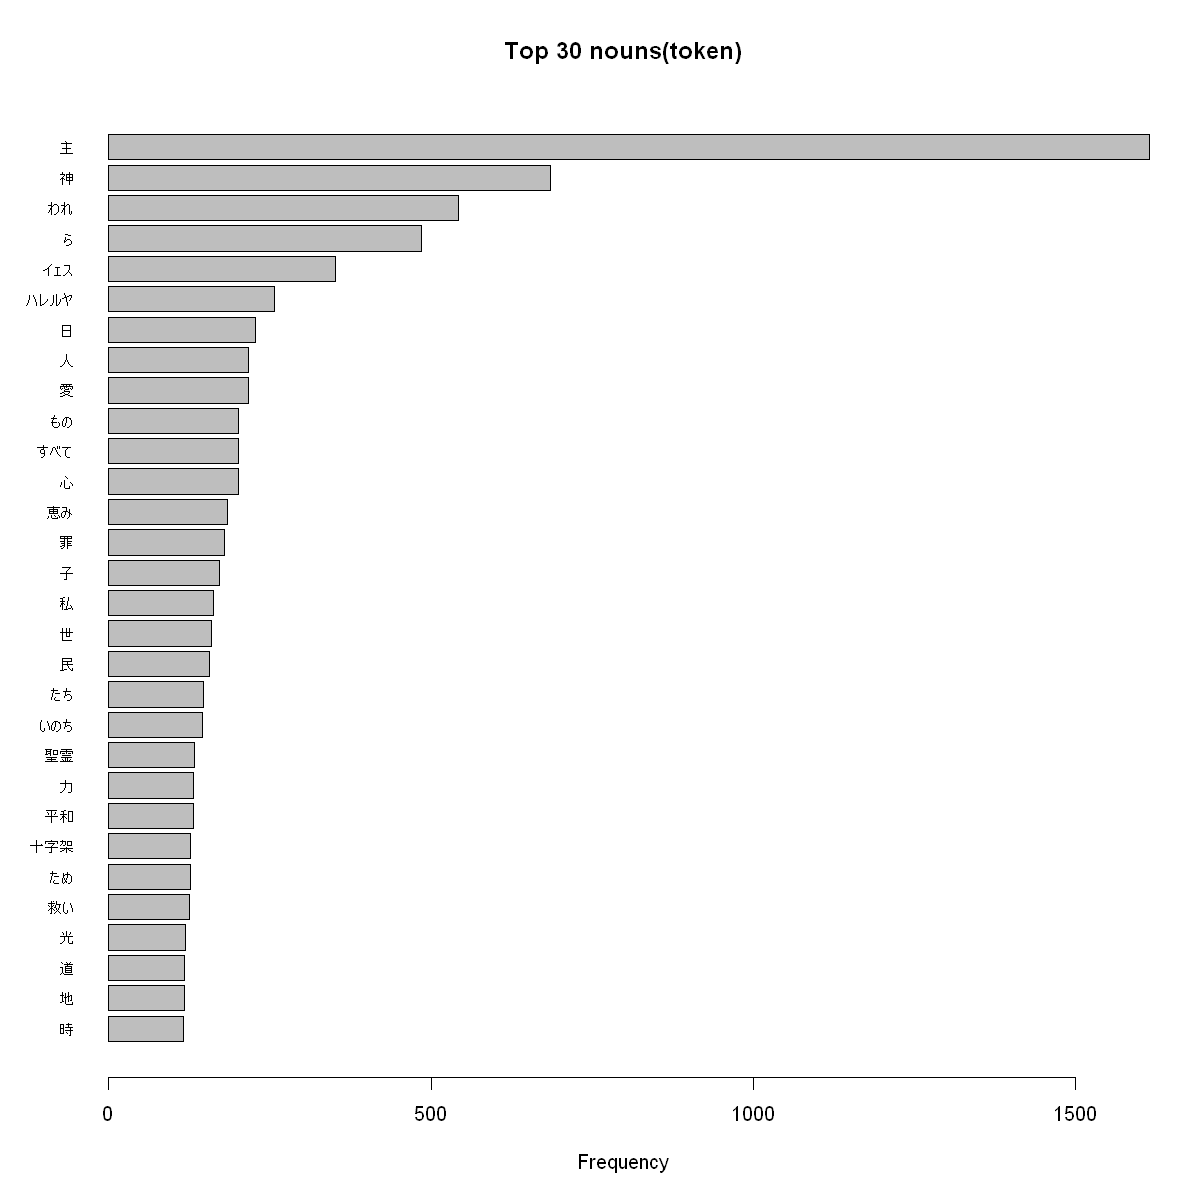

In [23]:
options(repr.plot.width=10, repr.plot.height=10)
freq_noun_token %>% sort() %>% tail(30) %>% barplot(horiz=T, las=1, main='Top 30 nouns(token)', xlab='Frequency', cex.names = 0.7)

In [24]:
#  stopwords
stopwords = c('ら', 'ため', 'たち',  'もの')

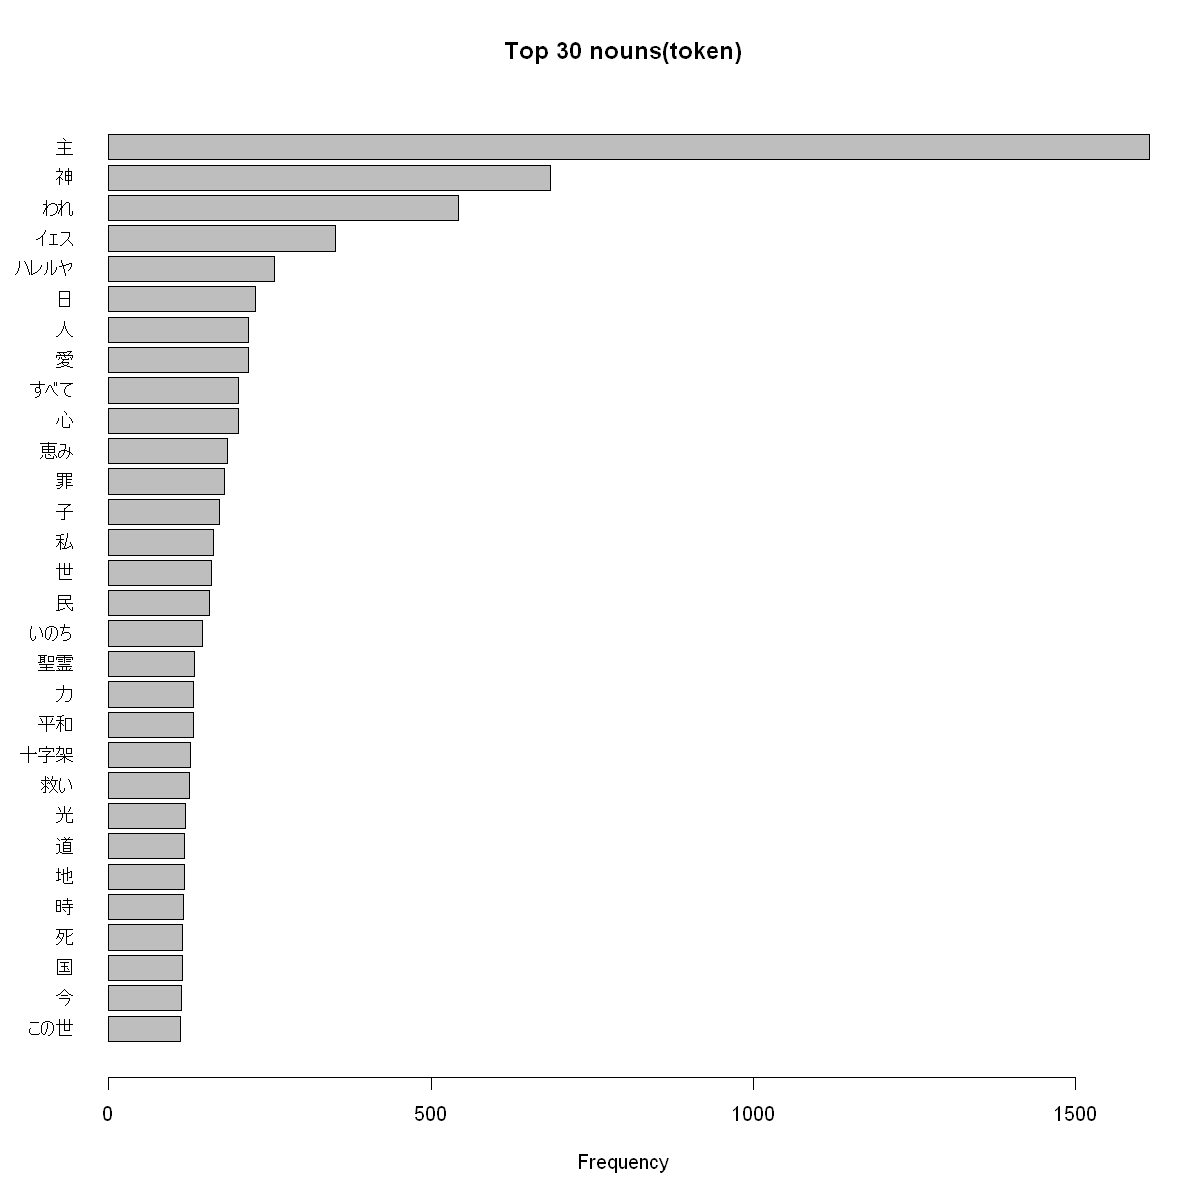

In [25]:
# tableなので以下の書き方にする
freq_noun_token[!names(freq_noun_token) %in% stopwords] %>% 
    sort() %>% 
    tail(30) %>% 
    barplot(horiz=T, las=1, main='Top 30 nouns(token)', xlab='Frequency')

In [27]:

# タイプを数える：曲に登場していれば１、そうでなければ０
count_noun_type = count_noun
count_noun_type[count_noun_type > 0] = 1
freq_noun_type = count_noun_type %>% rowSums()


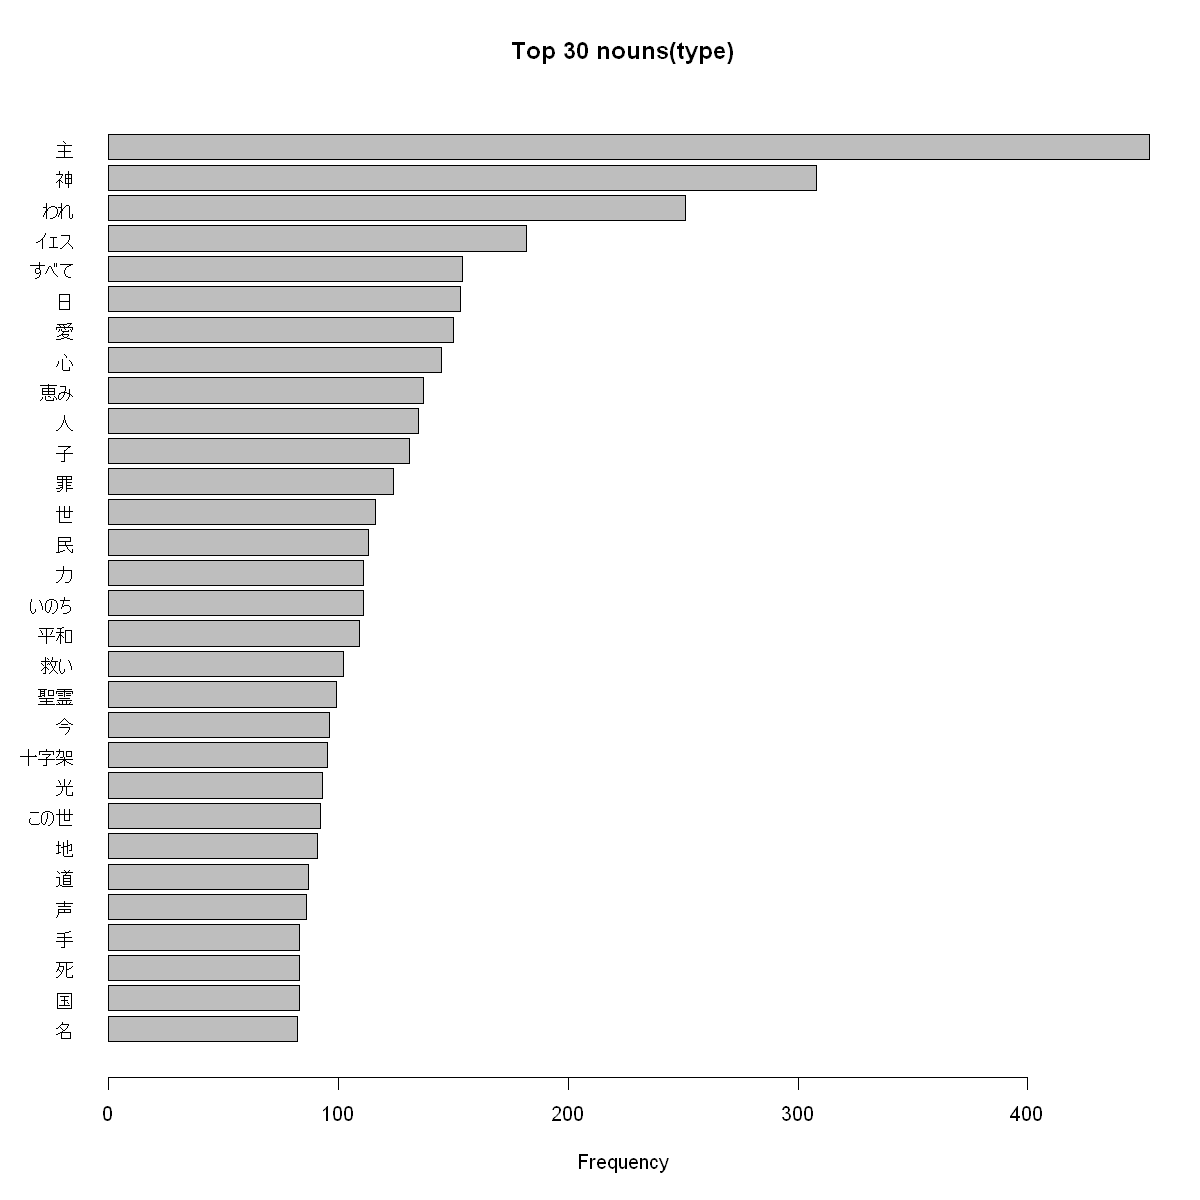

In [28]:
freq_noun_type[!names(freq_noun_type) %in% stopwords] %>% 
    sort() %>% 
    tail(30) %>% 
    barplot(horiz=T, las=1, main='Top 30 nouns(type)', xlab='Frequency')

## メタデータの読み込み

In [29]:
metadata = read.delim('data/sanbika21_metadata.tsv', header=T, sep='\t', stringsAsFactors=F, fileEncoding='utf8')

+ major / major_id 大カテゴリとそのid
+ minor / minor_id 大カテゴリ内の細目と通番id
+ key 楽曲の調性。単旋律の楽曲には(monophony)

In [30]:
metadata %>% head()

,id,title,major_id,major,minor_id,minor,key
,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<chr>
1,001,主イェスよ、われらに,1,礼拝,1,招き,F major
2,002,聖なるみ神は,1,礼拝,1,招き,D major
3,003,扉を開きて,1,礼拝,1,招き,Bb major
4,004,世にあるかぎりの,1,礼拝,1,招き,G major
5,005,わたしたちは神の民,1,礼拝,1,招き,F major
6,006,つくりぬしを賛美します,1,礼拝,1,招き,D major


In [31]:
# str_c() 文字列ベクトルを結合させる
str_c(metadata$major_id, metadata$major, sep='-') %>% table() %>% as.data.frame()

.,Freq
<fct>,<int>
1-礼拝,111
2-諸式,19
3-詩編と頌歌,89
4-礼拝の時と教会暦,188
5-教会,40
6-キリスト者の生活,139
7-終末,12


In [32]:
str_c(metadata$major_id, metadata$minor_id, metadata$major, metadata$minor, sep='-') %>% table() %>% as.data.frame()

.,Freq
<fct>,<int>
1-1-礼拝-招き,6
1-10-礼拝-主の祈り,2
1-11-礼拝-奉献・献金,3
1-12-礼拝-洗礼,5
1-13-礼拝-聖餐,12
1-14-礼拝-聖餐/聖なるかな,3
1-15-礼拝-聖餐/神の小羊,2
1-16-礼拝-派遣,5
1-2-礼拝-賛美・感謝,15


In [33]:
metadata$key %>% table() %>% sort(decreasing=T) 

.
    F major     D major     G major    Eb major     D minor     C major 
        127          91          78          55          46          38 
    E minor     G minor    Bb major     C minor (monophony)     A major 
         27          27          24          19          15          12 
   Ab major     A minor     F minor     B minor     E major    Db major 
         11          10           8           3           3           1 
   Db minor    F# minor    Gb major 
          1           1           1 

In [34]:
data = merge(songs, metadata, on='id')

In [35]:
agg = data %>% filter(major_id == 4) %>% group_by(minor_id, minor) %>% 
    summarise(n= n(), lyrics = paste0(body, collapse='\n')) %>% as.data.frame()

`summarise()` regrouping output by 'minor_id' (override with `.groups` argument)



In [36]:
agg$length = agg[, 'lyrics'] %>% str_length()

In [37]:
agg %>% select(minor_id, minor, n, length)

minor_id,minor,n,length
<int>,<chr>,<int>,<int>
27,主の日,6,1052
28,朝夕の歌,14,2492
29,教会暦/創造,6,1546
30,教会暦/待降・再臨・アドヴェント,17,3548
31,教会暦/降誕・クリスマス,29,6060
32,教会暦/公現,6,1233
33,教会暦/キリストの生涯,12,2232
34,教会暦/受難・レント,24,5285
35,教会暦/復活・イースター,20,3988


In [38]:
# 3曲以上含まれているものを対象にする
agg_count = docMatrixDF(agg[agg$n >= 3,'lyrics'], pos=c('名詞'))

to make data frame



In [39]:
# 列名をつける
colnames(agg_count) = agg[agg$n >= 3, 'minor']

In [40]:
agg_count = agg_count[!str_detect(rownames(agg_count), "[a-zA-Z：:!,\\.]"), ]

### TF-IDF

$$
TF_{i,j} = \frac{n_{i,j}}{\sum{_{k}n_{k,j}}} = \frac{文書 d_j における単語 t_i の頻度}{文書d中の総単語数}
$$

$$
IDF{i,j} = \log{\frac{|D|}{|{d:d \ni t_i}|}} = \log{(1 / \frac{ 単語t_iを含む文書数}{ 総文書数})}
$$

$$
TFIDF_{i,j} = TF_{i,j} \times IDF_{i,j}
$$


In [41]:
# tf, idfをそれぞれ求める関数

tf = function(df){
    return(t(t(df) / colSums(df)))
}

idf = function(df){
    doc_sums = (df > 0) %>% rowSums() + 1
    return(log2(ncol(df)/doc_sums))
}

In [42]:
tfidf= tf(agg_count) * idf(agg_count) 

In [43]:
agg_count %>% dim()

[1] 922  17

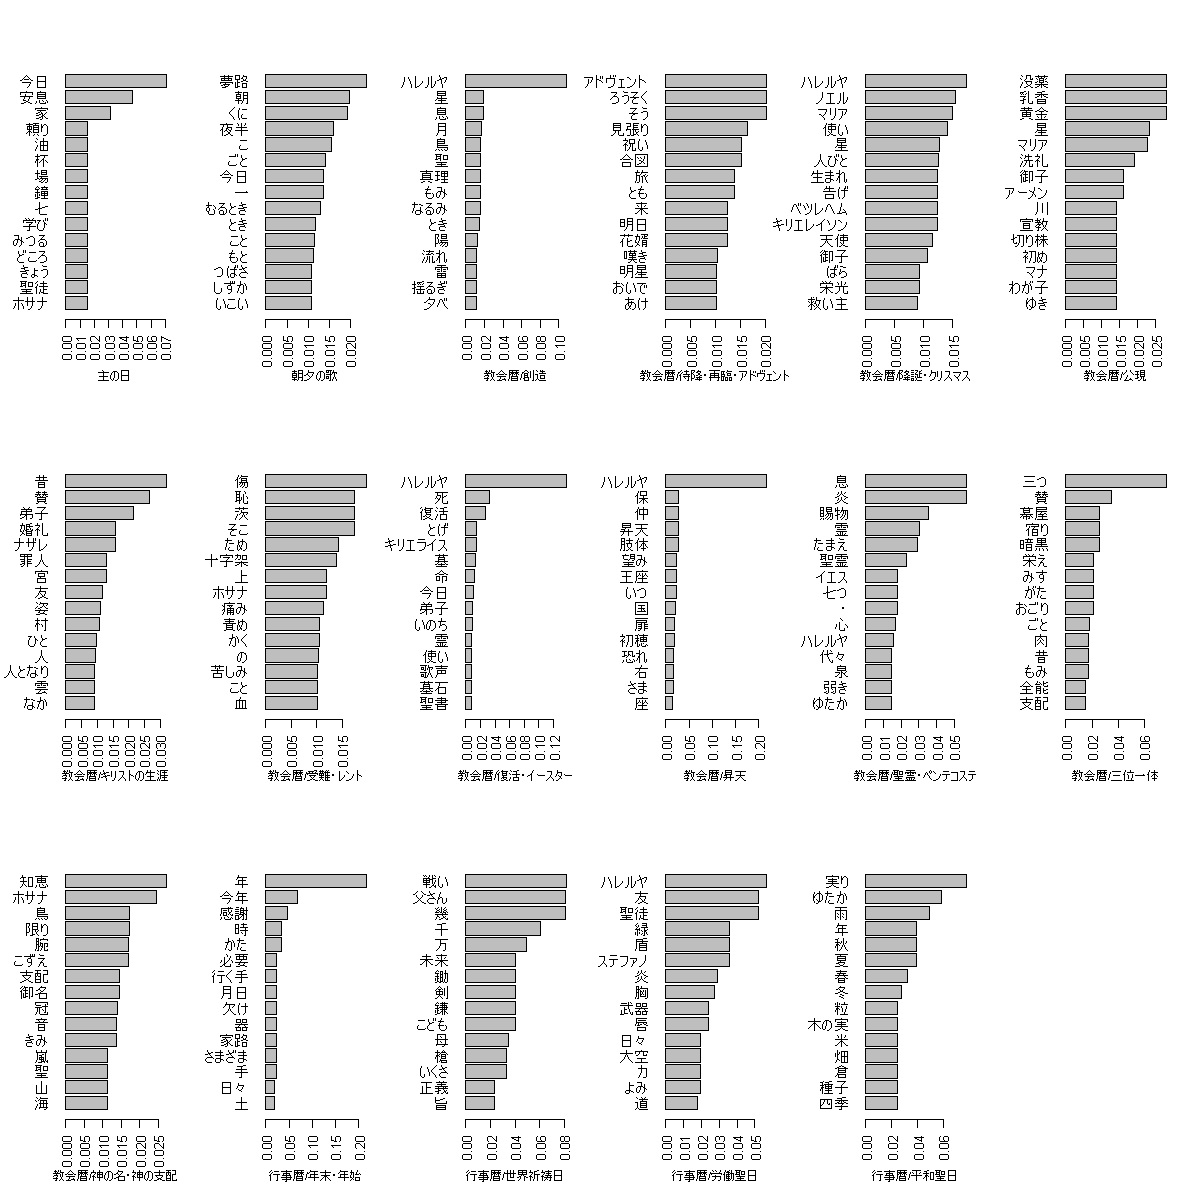

In [44]:
# 図を大きくするオプション
options(repr.plot.width=10, repr.plot.height=10)

# 3行6列の描画スペースを準備する
par(mfrow=c(3,6), cex.lab = 0.8) 

# 1枚ずつ描画
for(i in 1:17){
    tfidf[,i] %>% 
        sort() %>% 
        tail(15)  %>%  barplot(horiz=T, las=2, main=character(i), xlab=agg$minor[i])
}

# もとに戻す
par(mfrow=c(1,1), cex.lab=1) 

In [45]:
# タイプで計算

d = count_noun_type %>% t() %>% as.data.frame()

In [46]:
d$id = songs$id

In [47]:
d = merge(metadata, d, on='id')

In [48]:
agg = d %>% filter(major_id == 4) %>% 
    group_by(major_id, minor_id, minor) %>% 
    summarise_if(is.numeric, funs(sum)) %>% as.data.frame()

Warning message:
"`funs()` is deprecated as of dplyr 0.8.0.
Please use a list of either functions or lambdas: 

  # Simple named list: 
  list(mean = mean, median = median)

  # Auto named with `tibble::lst()`: 
  tibble::lst(mean, median)

  # Using lambdas
  list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated."


In [49]:
agg = agg[c(T, T, T, colSums(agg[4:ncol(agg)]) > 0)]

In [51]:
agg_count = t(agg[4:ncol(agg)])
agg_count = agg_count[!str_detect(rownames(agg_count), "[a-zA-Z：:!,\\.]"), ]
colnames(agg_count) = agg$minor
tfidf= tf(agg_count) * idf(agg_count) 

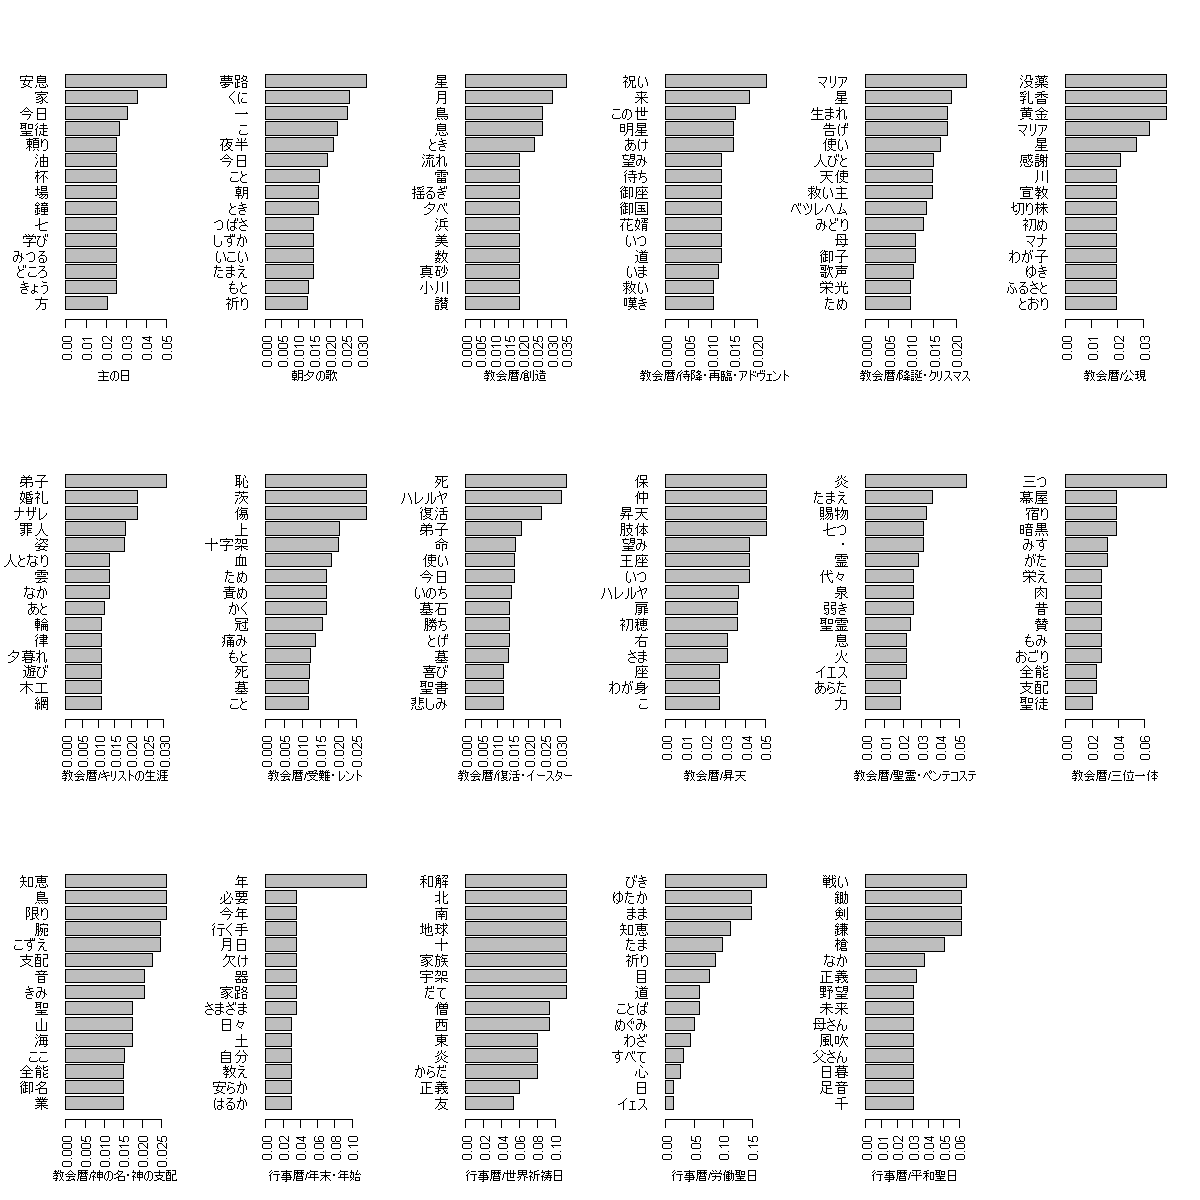

In [52]:
options(repr.plot.width=10, repr.plot.height=10)

par(mfrow=c(3,6), cex.lab = 0.8) 

for(i in 1:17){
    tfidf[,i] %>% 
        sort() %>% 
        tail(15)  %>%  barplot(horiz=T, las=2, main=character(i), xlab=agg$minor[i])
}

par(mfrow=c(1,1), cex.lab=1) 

In [53]:
agg_count = agg_count[!str_detect(rownames(agg_count), "[a-zA-Z：:!,\\.]"), ]

In [ ]:
# 共起分析
# ※tkplot()がjupyternotebookに対応していないのでRStudioで実演する

In [ ]:
# 名詞のバイグラムを求める
bigram = docDF(df, col='lyric', type=1, pos=c('名詞'), N=2, nDF=1)

In [ ]:
bigram %>% head()

In [ ]:
# アルファベットを除外
bigram = bigram %>% filter(!str_detect(N1, "[a-zA-Z：:!,\\.]")) %>% filter(!str_detect(N2, "[a-zA-Z：:!,\\.]"))

# 集計列を作る
bigram['freq'] = rowSums(bigram[5:ncol(bigram)])



In [ ]:
# tkplot(): ネットワークグラフを表示する。各ノードを動かすことが可能

net = bigram %>% 
    select(N1, N2, freq) %>%  
    filter(freq > 10) %>% # 頻度が10以上
    filter(! N1 %in% stopwords) %>% # n1, n2のいずれからもストップワードを除去
    filter(! N2 %in% stopwords) %>% 
    filter(! N1 == N2)


In [ ]:
net

In [ ]:
# なぜか同じ行が含まれているので合算する

net = bigram %>% 
    select(N1, N2, freq) %>%  
    filter(freq > 10) %>% # 頻度が10以上
    filter(! N1 %in% stopwords) %>% # n1, n2のいずれからもストップワードを除去
    filter(! N2 %in% stopwords) %>% 
    filter(! N1 == N2) %>% 
    group_by(N1, N2) %>% summarise(freq=sum(freq))

In [ ]:
# 数が多すぎるとネットワークグラフの描画が遅くなるので確認してから描画するのがよい
dim(net_new)

net %>% graph_from_data_frame() %>% tkplot(vertex.color='SkyBlue', vertex.size=22)

In [ ]:
# 調性の分析(間に合わなかったので割愛)